In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [116]:
df_train = pd.read_csv('datasets/titanic/train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [117]:
column_names = ['PassengerId', 'Name', 'Ticket', 'Cabin']

df_train = df_train.drop(column_names, axis=1)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [118]:
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [119]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [120]:
median = df_train['Age'].median()

df_train['Age'].fillna(median, inplace=True)
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [121]:
df_train = df_train.dropna(subset=['Embarked'])
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [122]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Fare'>

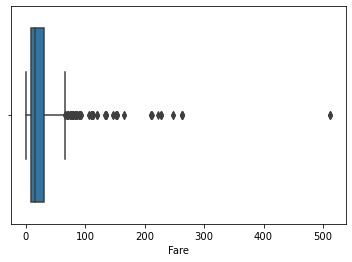

In [123]:
sns.boxplot(x=df_train['Fare'])

<AxesSubplot:xlabel='Fare'>

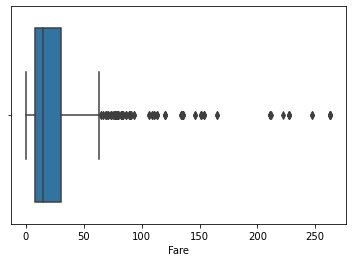

In [124]:
df_train = df_train.drop(df_train[df_train['Fare'] > 300].index)

sns.boxplot(x=df_train['Fare'])

In [125]:
df_train['Survived'].value_counts()

0    549
1    337
Name: Survived, dtype: int64

In [126]:
df_train['Pclass'].value_counts().sort_values(ascending=False)

3    491
1    211
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

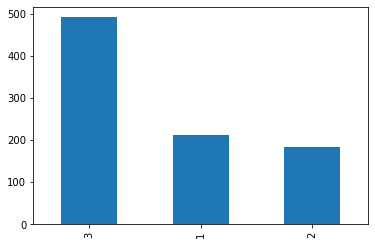

In [152]:
df_train['Pclass'].value_counts().plot(kind='bar')

In [127]:
df_train['Sex'].value_counts()

male      575
female    311
Name: Sex, dtype: int64

In [128]:
df_train['Embarked'].value_counts()

S    644
C    165
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:>

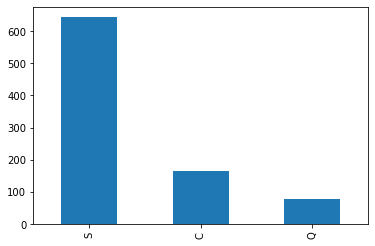

In [149]:
df_train['Embarked'].value_counts().plot(kind='bar')

In [129]:
df_train['SibSp'].value_counts()

0    603
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:>

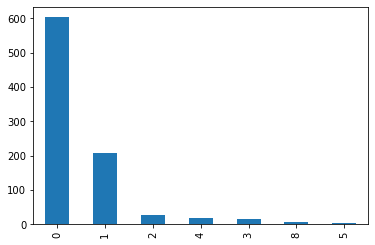

In [150]:
df_train['SibSp'].value_counts().plot(kind='bar')

In [130]:
df_train['Parch'].value_counts()

0    674
1    117
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:>

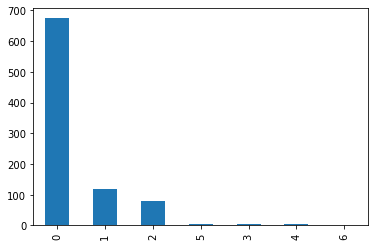

In [151]:
df_train['Parch'].value_counts().plot(kind='bar')

In [131]:
df_train['Age'].describe()

count    886.000000
mean      29.294774
std       13.002157
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

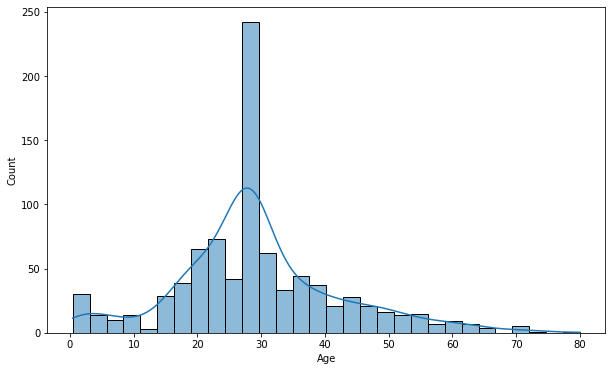

In [132]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train['Age'], kde=True)

In [133]:
df_train['Fare'].describe()

count    886.000000
mean      30.470611
std       41.155721
min        0.000000
25%        7.895800
50%       14.454200
75%       30.646850
max      263.000000
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

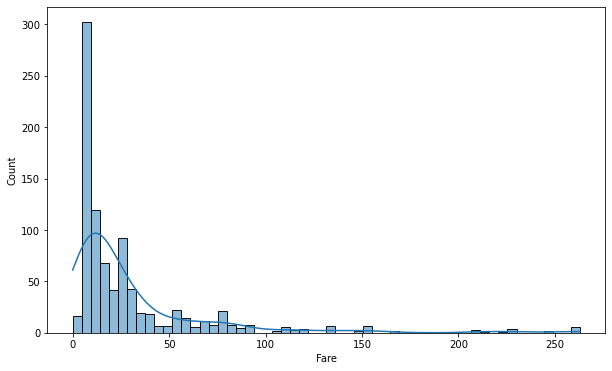

In [134]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train['Fare'], kde=True)

In [136]:
pd.crosstab(df_train['Survived'], df_train['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,131,87,119


<AxesSubplot:xlabel='Survived'>

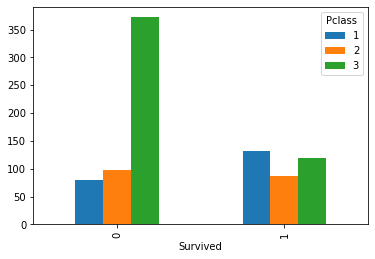

In [154]:
pd.crosstab(df_train['Survived'], df_train['Pclass']).plot(kind='bar')

In [137]:
pd.crosstab(df_train['Survived'], df_train['Sex'])

Sex,female,male
Survived,,
0,81,468
1,230,107


<AxesSubplot:xlabel='Survived'>

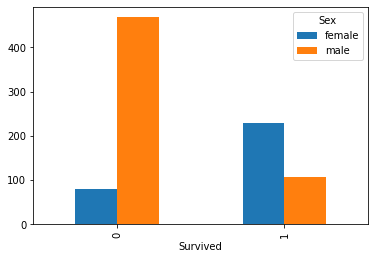

In [155]:
pd.crosstab(df_train['Survived'], df_train['Sex']).plot(kind='bar')

In [138]:
pd.crosstab(df_train['Survived'], df_train['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,90,30,217


<AxesSubplot:xlabel='Survived'>

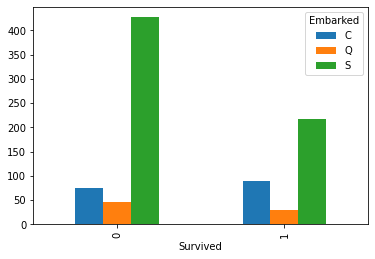

In [156]:
pd.crosstab(df_train['Survived'], df_train['Embarked']).plot(kind='bar')

In [159]:
pd.crosstab(df_train['Sex'], df_train['Pclass'])

Pclass,1,2,3
Sex,,,
female,91,76,144
male,120,108,347


In [162]:
pd.crosstab(df_train['Embarked'], df_train['Pclass'])

Pclass,1,2,3
Embarked,,,
C,82,17,66
Q,2,3,72
S,127,164,353


<AxesSubplot:>

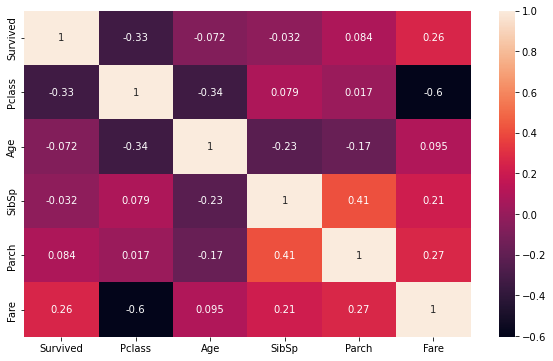

In [163]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=df_train.corr(), annot=True)

In [164]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [165]:
label_encoder = LabelEncoder()

In [166]:
df_train['Sex'] = label_encoder.fit_transform(df_train['Sex'])
df_train['Embarked'] = label_encoder.fit_transform(df_train['Embarked'])

df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [167]:
x = df_train.drop('Survived', axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [168]:
y = df_train['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 886, dtype: int64

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [171]:
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8157894736842105

In [170]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7819548872180451

In [172]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7669172932330827

In [173]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6766917293233082

In [174]:
model = SVC()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6541353383458647

In [ ]:
grid = {
    penalty: ['l1', 'l2', None],
    C: 
}